In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


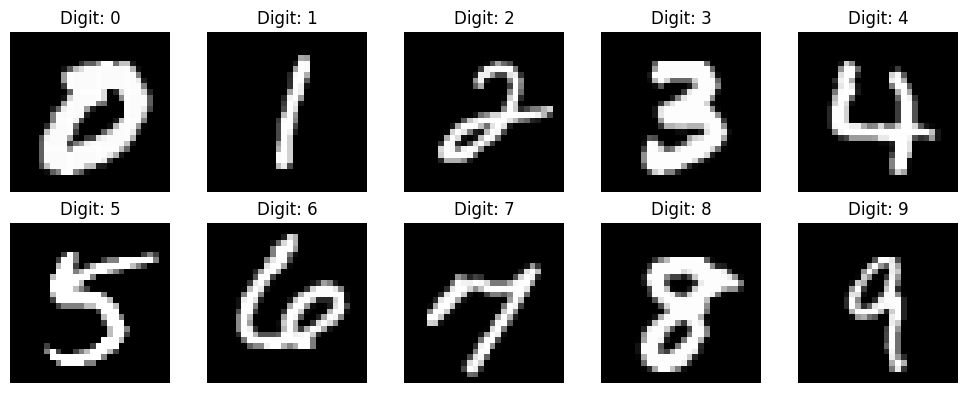

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for digit in range(10):
    indices = np.where(y_train == digit)[0]
    idx = np.random.choice(indices)

    ax = axes[digit // 5, digit % 5]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f"Digit: {digit}")
    ax.axis('off')

plt.tight_layout()
plt.show()

Κάθε εικόνα του MNIST έχει μέγεθος 28×28 pixels άρα σύνολο 784. Επίσης, δεν είναι όλα αυτά τα pixels εξίσου σημαντικά. Το μεγαλύτερο μέρος της εικόνας έχει μαύρο φόντο, χωρίς να περιέχει κάποια ουσιαστική πληροφορία, ενώ τα pixels που έχουν πραγματική σημασία είναι εκείνα που σχηματίζουν τις γραμμές και τις καμπύλες του αριθμού, δηλαδή τα pixels που έχουν κάποια τιμή φωτεινότητας. Τα νευρωνικά εστιάζουν κυρίως στα pixels που έχουν κάποια πληροφορία και όχι σε αυτά που είναι μηδέν. Για τον λόγο αυτό, η ταξινόμηση δεν επηρεάζεται αν αφαιρεθούν ή αγνοηθούν περιοχές του φόντου, καθώς δεν περιέχουν χρήσιμη πληροφορία. Άρα καταλήγουμε στο ότι δεν είναι όλα τα pixels της εικόνας το ίδιο σημαντικά.

In [ ]:
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)


KNN με k = 5
Train accuracy: 0.9819
Test  accuracy: 0.9688

KNN με k = 15
Train accuracy: 0.9710
Test  accuracy: 0.9633

KNN με k = 51
Train accuracy: 0.9532
Test  accuracy: 0.9533

KNN με k = 244
Train accuracy: 0.9211
Test  accuracy: 0.9241


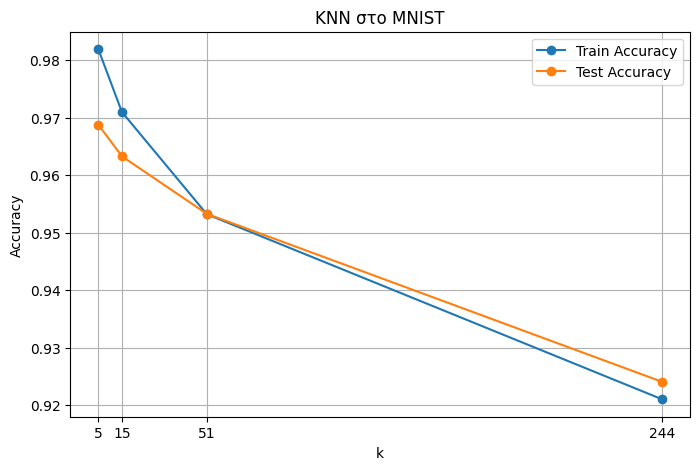

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

N = x_train.shape[0]
k_values = [5, 15, 51, int(np.sqrt(N))]

train_acc = []
test_acc = []

for k in k_values:
    print(f"\nKNN με k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto',metric='euclidean',n_jobs=-1)
    knn.fit(x_train_flat, y_train)
    y_pred_train = knn.predict(x_train_flat)
    y_pred_test  = knn.predict(x_test_flat)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test  = accuracy_score(y_test, y_pred_test)
    train_acc.append(acc_train)
    test_acc.append(acc_test)

    print(f"Train accuracy: {acc_train:.4f}")
    print(f"Test  accuracy: {acc_test:.4f}")

plt.figure(figsize=(8,5))
plt.plot(k_values, train_acc, marker='o', label='Train Accuracy')
plt.plot(k_values, test_acc, marker='o', label='Test Accuracy')
plt.xticks(k_values, k_values)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN στο MNIST")
plt.grid(True)
plt.legend()
plt.show()


KNN με k = 5
Train accuracy: 0.9819
Test  accuracy: 0.9688

KNN με k = 15
Train accuracy: 0.9710
Test  accuracy: 0.9633

KNN με k = 51
Train accuracy: 0.9532
Test  accuracy: 0.9533

KNN με k = 244
Train accuracy: 0.9211
Test  accuracy: 0.9241


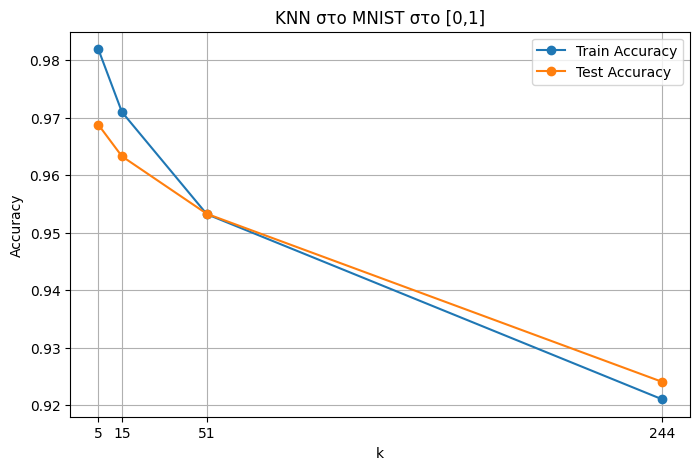

In [16]:
x_train_scaled = x_train / 255.0
x_test_scaled  = x_test / 255.0

x_train_flat = x_train_scaled.reshape((x_train_scaled.shape[0], -1))
x_test_flat  = x_test_scaled.reshape((x_test_scaled.shape[0], -1))

N = x_train_flat.shape[0]
k_values = [5, 15, 51, int(np.sqrt(N))]

train_acc = []
test_acc = []

for k in k_values:
    print(f"\nKNN με k = {k}")
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto',metric='euclidean',n_jobs=-1)
    knn.fit(x_train_flat, y_train)

    y_pred_train = knn.predict(x_train_flat)
    y_pred_test  = knn.predict(x_test_flat)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test  = accuracy_score(y_test, y_pred_test)

    train_acc.append(acc_train)
    test_acc.append(acc_test)

    print(f"Train accuracy: {acc_train:.4f}")
    print(f"Test  accuracy: {acc_test:.4f}")

plt.figure(figsize=(8,5))
plt.plot(k_values, train_acc, marker='o', label='Train Accuracy')
plt.plot(k_values, test_acc, marker='o', label='Test Accuracy')
plt.xticks(k_values, k_values)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN στο MNIST στο [0,1]")
plt.grid(True)
plt.legend()
plt.show()

Μετά την κανονικοποίηση των τιμών στο διάστημα [0,1] μέσω διαίρεσης με το 255,τα αποτελέσματα του KNN δεν αλλάζουν. Αυτό γίνεται γιατί όλα τα χαρακτηριστικά πολλαπλασιάζονται με την ίδια σταθερά. Στην ευκλείδεια απόσταση όλες οι αποστάσεις πολλαπλασιάζονται απλά με 1/255, χωρίς να αλλάζει η σειρά των κοντινότερων γειτόνων. Επομένως, οι προβλέψεις του μοντέλου παραμένουν ίδιες και η ακρίβεια δεν αλλάζει.

In [20]:
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',metric='euclidean',n_jobs=-1)
knn.fit(x_train_flat, y_train)

from PIL import Image

img = Image.open('three_imresizer.jpg')
img = img.convert('L')
img_arr = np.array(img)
print(img_arr.shape)
img_arr = img_arr / 255.0
img_flat = img_arr.reshape(1, -1)
pred = knn.predict(img_flat)

print("Το μοντέλο αναγνωρίζει το ψηφίο ως:", pred[0])

(28, 28)
Το μοντέλο αναγνωρίζει το ψηφίο ως: 3
